# Planck Convergence 2018

In [1]:
# some_file.py
import sys
import yaml
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/jaimerz/PhD/xCell')

from xcell.mappers import MapperP18CMBK
from xcell.mappers import utils
from xcell.cls.data import Data
from xcell.cls.cl import Cl
from xcell.cls.cov import Cov
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import numpy as np

### Configurations

In [2]:
data = Data(data_path="../config_files/master.yml")

/home/jaimerz/PhD/xCell/xcell/cls/data.py:416: UserWarning: A YML file was found in outdir: ../reruns/. Using it                  instead of input config.
  warn(f'A YML file was found in outdir: {outdir}. Using it \


### Mappers

In [3]:
Planck__kappa18 = data.get_mapper("Planck__kappa18")
Planck__kappa18_map = Planck__kappa18.get_signal_map()

setting the output map dtype to [dtype('float64')]


Saving ../reruns/P18CMBK_signal_map_coordC_ns512.fits.gz


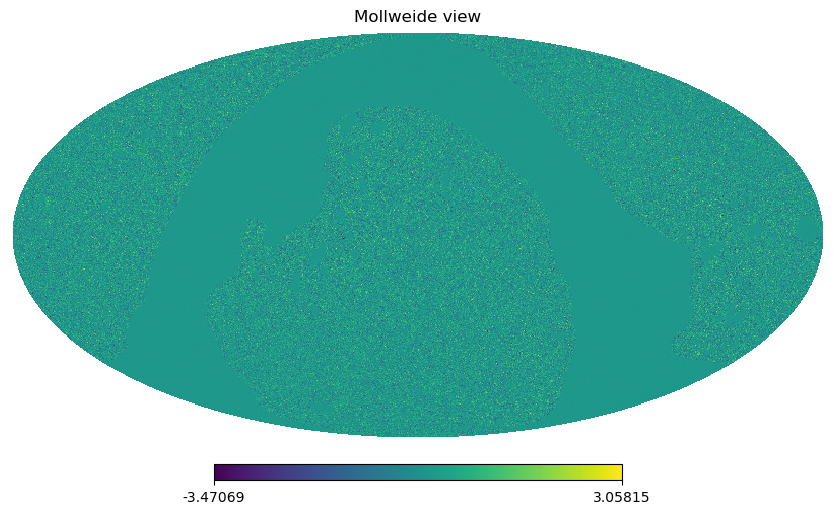

In [4]:
hp.visufunc.mollview(map=np.array(Planck__kappa18_map)[0])

### Cl's

In [5]:
cl_Planck__kappa18_Planck__kappa18 = Cl(data.data, "Planck__kappa18", "Planck__kappa18")
cl_Planck__kappa18_Planck__kappa18 = cl_Planck__kappa18_Planck__kappa18.get_ell_cl()

Computing Cell for Planck__kappa18 Planck__kappa18
Reading ../reruns/P18CMBK_signal_map_coordC_ns512.fits.gz


: 

: 

### Covariance Matrix

In [ ]:
cov_Planck__kappa18_Planck__kappa18_Planck__kappa18_Planck__kappa18 = Cov(data.data, "Planck__kappa18", "Planck__kappa18", "Planck__kappa18", "Planck__kappa18")
cov_Planck__kappa18_Planck__kappa18_Planck__kappa18_Planck__kappa18 = cov_Planck__kappa18_Planck__kappa18_Planck__kappa18_Planck__kappa18.get_covariance()
err_Planck__kappa18_Planck__kappa18 = np.sqrt(np.diag(cov_Planck__kappa18_Planck__kappa18_Planck__kappa18_Planck__kappa18))

### Theory Cl's

In [ ]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
tracer_Planck__kappa18 = ccl.CMBLensingTracer(cosmo, 1100)
clt_Planck__kappa18_Planck__kappa18 = ccl.angular_cl(cosmo, tracer_Planck__kappa18, tracer_Planck__kappa18, ell_arr) 

### Comparison

In [ ]:
plt.errorbar(cl_Planck__kappa18_Planck__kappa18[0], cl_Planck__kappa18_Planck__kappa18[1][0], yerr=err_Planck__kappa18_Planck__kappa18, fmt='o-', label='data')
plt.plot(cl_Planck__kappa18_Planck__kappa18[0], clt_Planck__kappa18_Planck__kappa18, 'o-', label='theory')
plt.title('Planck__kappa18-Planck__kappa18')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [ ]:
Planck__kappa18 = {
    "cl": cl_Planck__kappa18_Planck__kappa18,
    "err": err_Planck__kappa18_Planck__kappa18,
    }

In [ ]:
np.savez("../results/Planck__kappa18", Planck__kappa18)

In [ ]:
import shutil
shutil.rmtree("../reruns/")